In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.DataFrame()

In [4]:
df

Empty DataFrame
Columns: []
Index: []

In [5]:
np.random.seed(42)

In [6]:
X=np.random.rand(100,1)-0.5   #Let we are generating 100 data and 0.5 is the given column

In [7]:
X

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258],
       [-0.47941551],
       [ 0.46990985],
       [ 0.33244264],
       [-0.28766089],
       [-0.31817503],
       [-0.31659549],
       [-0.19575776],
       [ 0.02475643],
       [-0.06805498],
       [-0.20877086],
       [ 0.11185289],
       [-0.36050614],
       [-0.20785535],
       [-0.13363816],
       [-0.04393002],
       [ 0.28517596],
       [-0.30032622],
       [ 0.01423444],
       [ 0.09241457],
       [-0.45354959],
       [ 0.10754485],
       [-0.32947588],
       [-0.43494841],
       [ 0.44888554],
       [ 0.46563203],
       [ 0.30839735],
       [-0.19538623],
       [-0.40232789],
       [ 0.18423303],
       [-0.05984751],
       [-0.37796177],
       [-0.00482309],
       [-0.46561148],
       [ 0.4093204 ],
       [-0.24122002],
       [ 0

In [8]:
y= 3*X[:,0]**2 + 0.05* np.random.randn(100)

In [9]:
y

array([ 5.15728987e-02,  5.94479790e-01,  1.66051606e-01, -7.01779562e-02,
        3.43985933e-01,  3.72874939e-01,  6.59764984e-01,  3.76341398e-01,
       -9.75194335e-03,  1.04794741e-01,  7.35287787e-01,  6.78883363e-01,
        3.05066318e-01,  2.73909733e-01,  3.08559932e-01,  3.49130363e-01,
        7.98606436e-02, -1.45444646e-02, -5.71096619e-03,  5.75800683e-02,
        5.23392240e-02,  4.02946793e-01,  1.29867214e-01,  4.18481141e-02,
       -6.49789982e-02,  2.22943721e-01,  2.53451786e-01, -3.95060058e-02,
        1.75570720e-02,  6.37324227e-01,  1.29006981e-01,  3.34391950e-01,
        5.80417870e-01,  6.00772381e-01,  5.54501010e-01,  2.84001079e-01,
        1.17538848e-01,  6.08765289e-01,  9.22073759e-02,  2.58225391e-02,
        4.26829699e-01, -5.83641153e-02,  7.07523289e-01,  5.40226226e-01,
        2.14112889e-01,  3.37711060e-02,  1.76497872e-01, -6.88843767e-02,
        3.58884053e-02,  4.07472924e-01,  6.12002352e-01,  1.98779325e-01,
        5.84460527e-01,  

In [10]:
df["X"]=X.reshape(100)

In [11]:
df

X
0  -0.125460
1   0.450714
2   0.231994
3   0.098658
4  -0.343981
..       ...
95 -0.006204
96  0.022733
97 -0.072459
98 -0.474581
99 -0.392109

[100 rows x 1 columns]

In [12]:
df["y"]=y

In [13]:
df.head()

X         y
0 -0.125460  0.051573
1  0.450714  0.594480
2  0.231994  0.166052
3  0.098658 -0.070178
4 -0.343981  0.343986

Text(0.5, 1.0, 'X vs y')

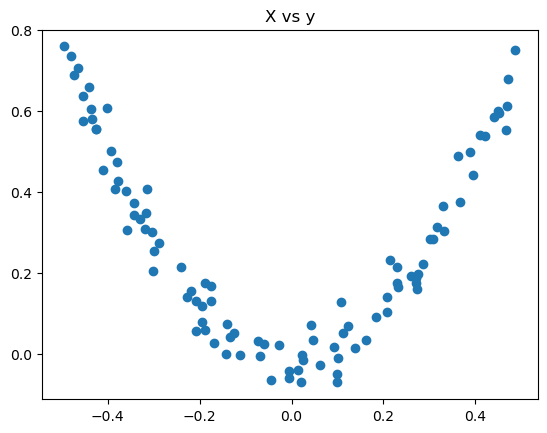

In [14]:
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

In [15]:
df["pred1[base_model]"]=df["y"].mean()   #step 1 is the average of the first column

In [19]:
df.drop("pred1",axis=1,inplace=True)

KeyError: "['pred1'] not found in axis"

In [20]:
df

X         y  pred1[base_model]
0  -0.125460  0.051573           0.265458
1   0.450714  0.594480           0.265458
2   0.231994  0.166052           0.265458
3   0.098658 -0.070178           0.265458
4  -0.343981  0.343986           0.265458
..       ...       ...                ...
95 -0.006204 -0.040675           0.265458
96  0.022733 -0.002305           0.265458
97 -0.072459  0.032809           0.265458
98 -0.474581  0.689516           0.265458
99 -0.392109  0.502607           0.265458

[100 rows x 3 columns]

In [21]:
df["res1"]=df["y"]-df["pred1[base_model]"]

In [22]:
df

X         y  pred1[base_model]      res1
0  -0.125460  0.051573           0.265458 -0.213885
1   0.450714  0.594480           0.265458  0.329021
2   0.231994  0.166052           0.265458 -0.099407
3   0.098658 -0.070178           0.265458 -0.335636
4  -0.343981  0.343986           0.265458  0.078528
..       ...       ...                ...       ...
95 -0.006204 -0.040675           0.265458 -0.306133
96  0.022733 -0.002305           0.265458 -0.267763
97 -0.072459  0.032809           0.265458 -0.232650
98 -0.474581  0.689516           0.265458  0.424057
99 -0.392109  0.502607           0.265458  0.237148

[100 rows x 4 columns]

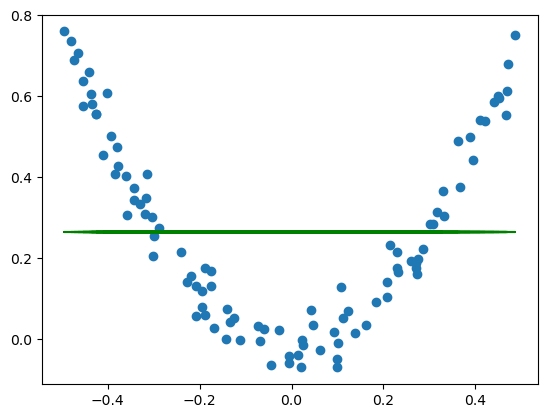

In [25]:
plt.scatter(df["X"],df['y'])
plt.plot(df["X"],df["pred1[base_model]"],color="green")

In [61]:
#so, now we would train our first decision tree on our residual
#X, res1
X=df["X"].values.reshape(100,1)

In [62]:
y=df["res1"]

In [63]:
from sklearn.tree import DecisionTreeRegressor
DT1=DecisionTreeRegressor(max_leaf_nodes=8)   #at last we need 8 leaf nodes)
DT1.fit(X,y)

DecisionTreeRegressor(max_leaf_nodes=8)

In [64]:
from sklearn.tree import plot_tree

[Text(0.4090909090909091, 0.9166666666666666, 'x[0] <= -0.36\nsquared_error = 0.056\nsamples = 100\nvalue = 0.0'),
 Text(0.18181818181818182, 0.75, 'x[0] <= -0.43\nsquared_error = 0.012\nsamples = 18\nvalue = 0.309'),
 Text(0.09090909090909091, 0.5833333333333334, 'squared_error = 0.004\nsamples = 9\nvalue = 0.395'),
 Text(0.2727272727272727, 0.5833333333333334, 'squared_error = 0.005\nsamples = 9\nvalue = 0.222'),
 Text(0.6363636363636364, 0.75, 'x[0] <= 0.322\nsquared_error = 0.04\nsamples = 82\nvalue = -0.068'),
 Text(0.45454545454545453, 0.5833333333333334, 'x[0] <= -0.235\nsquared_error = 0.016\nsamples = 67\nvalue = -0.142'),
 Text(0.36363636363636365, 0.4166666666666667, 'squared_error = 0.003\nsamples = 12\nvalue = 0.041'),
 Text(0.5454545454545454, 0.4166666666666667, 'x[0] <= 0.211\nsquared_error = 0.009\nsamples = 55\nvalue = -0.182'),
 Text(0.45454545454545453, 0.25, 'x[0] <= -0.172\nsquared_error = 0.005\nsamples = 42\nvalue = -0.223'),
 Text(0.36363636363636365, 0.0833333

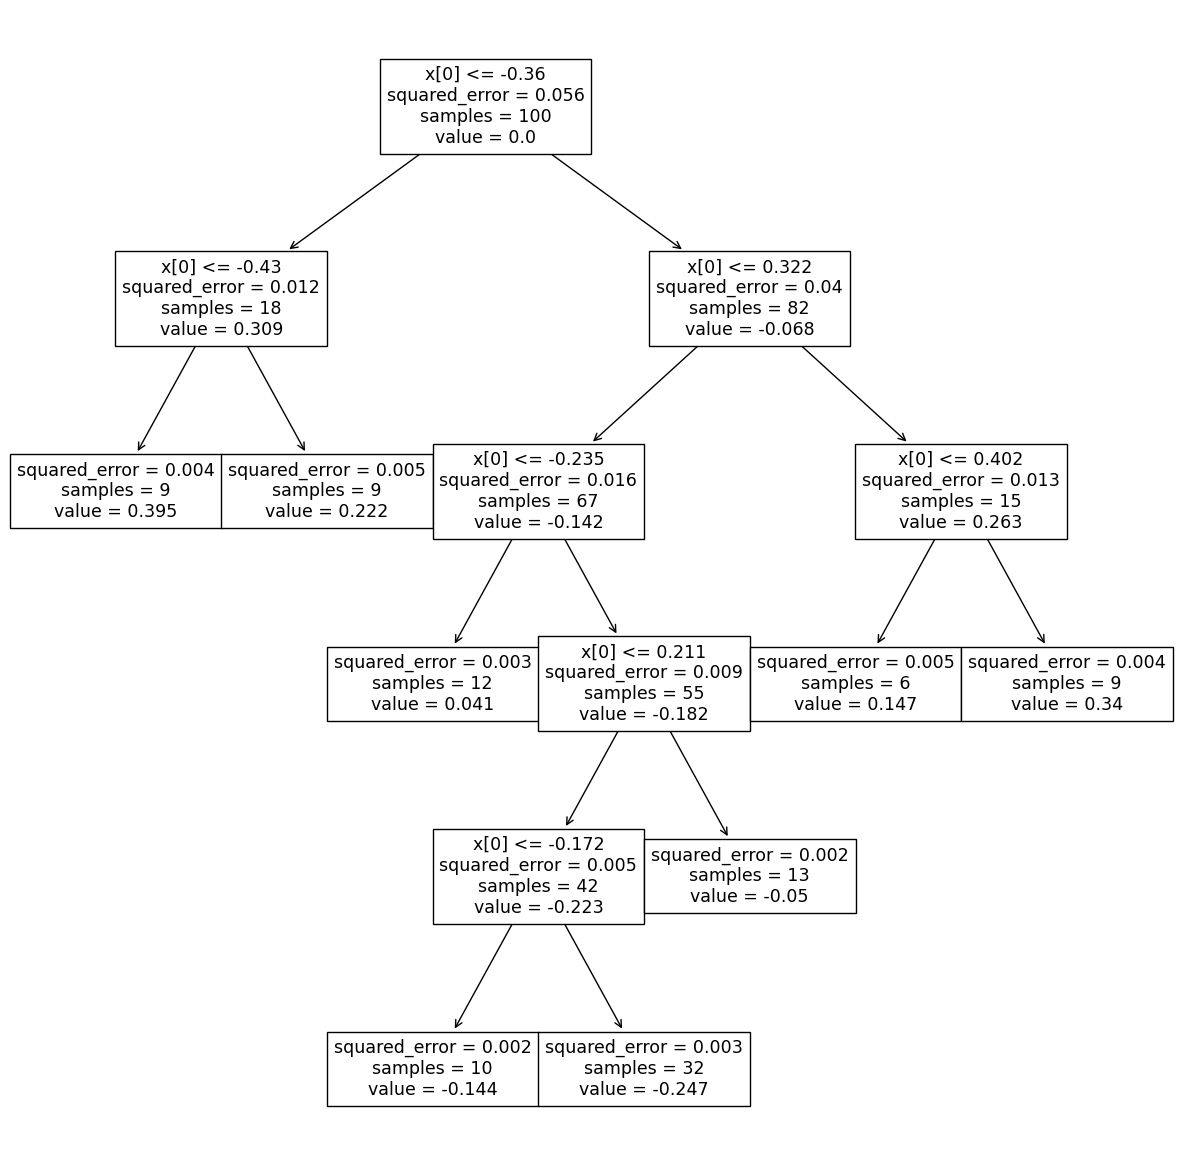

In [65]:
plt.figure(figsize=(15,15))
plot_tree(DT1)
#plt.show()   #to only show the decision tree

In [98]:
#final_model=BASE+alpha(DT1)

In [99]:
#unknown test data
X_test=np.linspace(-0.5,0.5,500)

In [100]:
X_test

array([-0.5       , -0.49799599, -0.49599198, -0.49398798, -0.49198397,
       -0.48997996, -0.48797595, -0.48597194, -0.48396794, -0.48196393,
       -0.47995992, -0.47795591, -0.4759519 , -0.4739479 , -0.47194389,
       -0.46993988, -0.46793587, -0.46593186, -0.46392786, -0.46192385,
       -0.45991984, -0.45791583, -0.45591182, -0.45390782, -0.45190381,
       -0.4498998 , -0.44789579, -0.44589178, -0.44388778, -0.44188377,
       -0.43987976, -0.43787575, -0.43587174, -0.43386774, -0.43186373,
       -0.42985972, -0.42785571, -0.4258517 , -0.4238477 , -0.42184369,
       -0.41983968, -0.41783567, -0.41583166, -0.41382766, -0.41182365,
       -0.40981964, -0.40781563, -0.40581162, -0.40380762, -0.40180361,
       -0.3997996 , -0.39779559, -0.39579158, -0.39378758, -0.39178357,
       -0.38977956, -0.38777555, -0.38577154, -0.38376754, -0.38176353,
       -0.37975952, -0.37775551, -0.3757515 , -0.37374749, -0.37174349,
       -0.36973948, -0.36773547, -0.36573146, -0.36372745, -0.36

In [105]:
#without alpha(learning rate)
#df["pred1[base_model]"]=BASE[0]
Y_PRED1=df["pred1[base_model]"][0]+(DT1.predict(X_test.reshape(500,1)))

In [106]:
#with alpha(learning rate)
Y_PRED2=df["pred1[base_model]"][0]+alpha*(DT1.predict(X_test.reshape(500,1)))

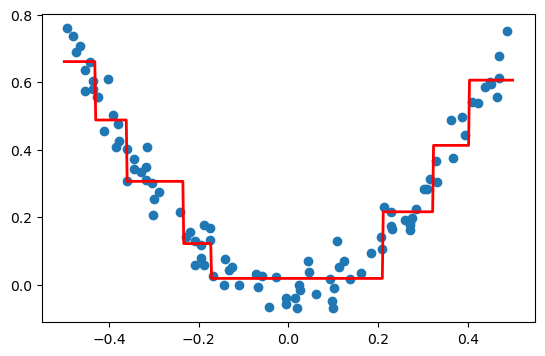

In [109]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test,Y_PRED1,linewidth=2,color='red') #curve between x_test and y_pred1
plt.scatter(df['X'],df['y']) #actual data

we can see the above red line is almost fitting the blue ones which is the actual one hence, without alpha it is overfitted. So, we would now see what happens after adding the alpha

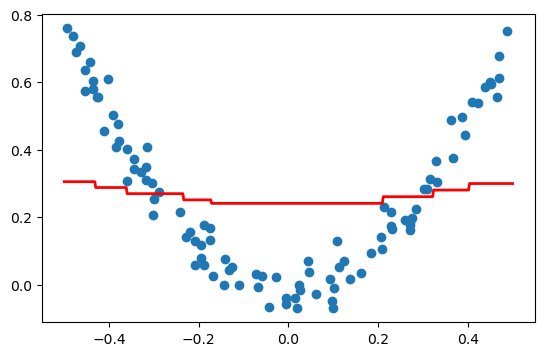

In [110]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test,Y_PRED2,linewidth=2,color='red') #curve between x_test and y_pred1
plt.scatter(df['X'],df['y']) #actual data

here we can see that the red line is not overfitting hence, after adding alpha(learning rate) it is learning gradually

In [97]:
DT1.score(X,y)

0.9160800823923317

In [66]:
df["pred2"]=DT1.predict(X)

In [67]:
df

X         y  pred1[base_model]      res1     pred2      res2
0  -0.125460  0.051573           0.265458 -0.213885 -0.247139 -0.190946
1   0.450714  0.594480           0.265458  0.329021  0.340426  0.296466
2   0.231994  0.166052           0.265458 -0.099407 -0.049674 -0.095246
3   0.098658 -0.070178           0.265458 -0.335636 -0.247139 -0.312697
4  -0.343981  0.343986           0.265458  0.078528  0.040506  0.074882
..       ...       ...                ...       ...       ...       ...
95 -0.006204 -0.040675           0.265458 -0.306133 -0.247139 -0.283194
96  0.022733 -0.002305           0.265458 -0.267763 -0.247139 -0.244824
97 -0.072459  0.032809           0.265458 -0.232650 -0.247139 -0.209711
98 -0.474581  0.689516           0.265458  0.424057  0.395454  0.387460
99 -0.392109  0.502607           0.265458  0.237148  0.222338  0.216385

[100 rows x 6 columns]

In [68]:
#loss=actual_value-(base+alpha*pred2)
alpha=0.1

In [69]:
df["res2"]=df["y"]-(df["pred1[base_model]"]+(alpha*df["pred2"]))

In [70]:
X=df["X"].values.reshape(100,1)   #since,only values would give me the array hence, we would reshape the values
y=df["res2"].values

In [71]:
X

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258],
       [-0.47941551],
       [ 0.46990985],
       [ 0.33244264],
       [-0.28766089],
       [-0.31817503],
       [-0.31659549],
       [-0.19575776],
       [ 0.02475643],
       [-0.06805498],
       [-0.20877086],
       [ 0.11185289],
       [-0.36050614],
       [-0.20785535],
       [-0.13363816],
       [-0.04393002],
       [ 0.28517596],
       [-0.30032622],
       [ 0.01423444],
       [ 0.09241457],
       [-0.45354959],
       [ 0.10754485],
       [-0.32947588],
       [-0.43494841],
       [ 0.44888554],
       [ 0.46563203],
       [ 0.30839735],
       [-0.19538623],
       [-0.40232789],
       [ 0.18423303],
       [-0.05984751],
       [-0.37796177],
       [-0.00482309],
       [-0.46561148],
       [ 0.4093204 ],
       [-0.24122002],
       [ 0

In [72]:
y

array([-0.18917161,  0.29497884, -0.09443935, -0.31092247,  0.07447691,
        0.10336592,  0.35476119,  0.09616931, -0.25049645, -0.13594977,
        0.430284  ,  0.37938241,  0.02489423,  0.00440072,  0.03905091,
        0.07962134, -0.1712113 , -0.25528897, -0.24645548, -0.19349187,
       -0.18840529,  0.11525455, -0.12120473, -0.1988964 , -0.30572351,
       -0.03754724, -0.01605723, -0.28025052, -0.22318744,  0.33232044,
       -0.11173753,  0.06488293,  0.27541408,  0.30127143,  0.25500006,
        0.02351012, -0.13353309,  0.32107305, -0.14853713, -0.21492197,
        0.13913746, -0.29910862,  0.4025195 ,  0.24072528, -0.05539613,
       -0.2069734 , -0.07457407, -0.30962889, -0.2048561 ,  0.13796391,
        0.3125014 , -0.06171163,  0.28495958,  0.16232004, -0.28952446,
        0.23786081,  0.16720784,  0.03144986,  0.26947965, -0.08204674,
       -0.24272894, -0.11033122,  0.08470883, -0.2407289 , -0.09572988,
       -0.16991851,  0.03692306,  0.02270978,  0.26832337,  0.45

In [73]:
from sklearn.tree import DecisionTreeRegressor
DT2=DecisionTreeRegressor(max_leaf_nodes=8)
DT2.fit(X,y)

DecisionTreeRegressor(max_leaf_nodes=8)

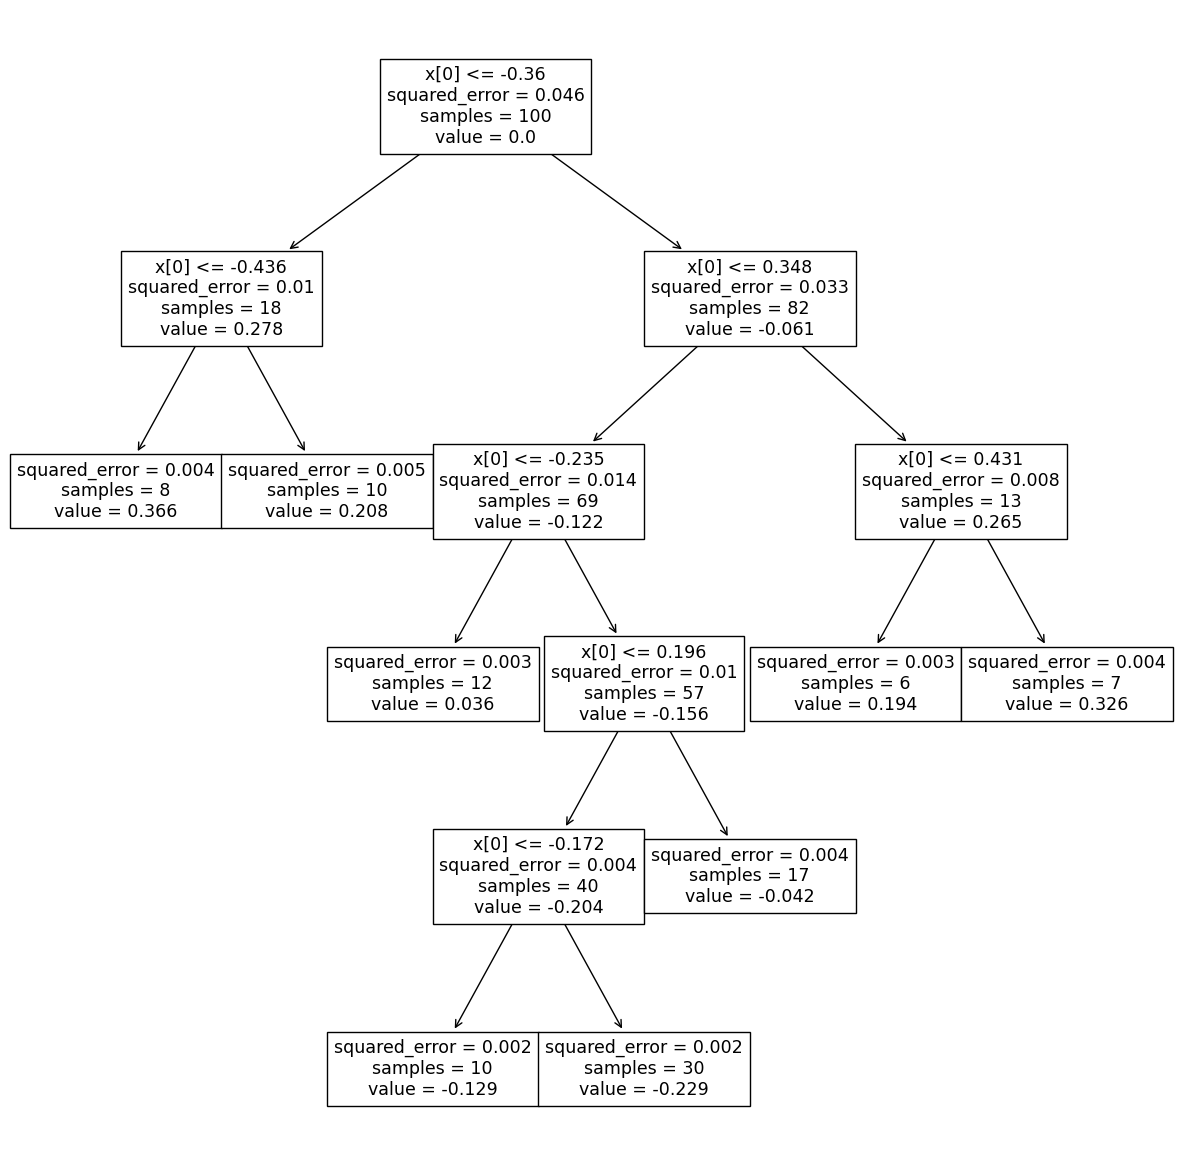

In [74]:
plt.figure(figsize=(15,15))
plot_tree(DT2)
plt.show()  

In [77]:
#final_pred=BASE+((alpha*DT1)+(alpha*DT2))

In [78]:
#let us assume our query point is
query=[[0.45071431]]

In [79]:
pred1=DT1.predict(query)

In [87]:
pred1

array([0.34042552])

In [81]:
pred2=DT2.predict(query)

In [88]:
pred2

array([0.32555151])

In [89]:
alpha

0.1

In [90]:
BASE=df["pred1[base_model]"]

In [91]:
BASE

0     0.265458
1     0.265458
2     0.265458
3     0.265458
4     0.265458
        ...   
95    0.265458
96    0.265458
97    0.265458
98    0.265458
99    0.265458
Name: pred1[base_model], Length: 100, dtype: float64

In [92]:
BASE[0]

0.26545839669679816

In [94]:
finalpred=BASE[0]+(alpha*pred1)+(alpha*pred2)

In [95]:
finalpred

array([0.3320561])

In [96]:
#since the y value against our query point 0.45071431 is 0.594480 which is much different from our final prediction
# 0.3320561 so, we have add on more models